# Neural network prediction for the sPOD-DL-ROM for CombustionWave

In [1]:
import sys
sys.path.append('LIB/')
sys.path.append('LIB/sPOD/lib/')
sys.path.append('LIB/DL_LIB/sPOD_DL_ROM/')

In [2]:
from CombustionWave import CombustionWave
import numpy as np

## Data generation / Shifted POD of the data

#############################################
Synthetic data checks....
Check 1...
Error for frame 1 SVD recons. with 5 number of modes is 2.326457454889009e-15
Error for frame 2 SVD recons. with 5 number of modes is 2.5193892869461453e-15
Check 2...
Transformation interpolation error =  8.1207e-06 


/Users/shubhadityaburela/Python/Restructuring/LIB/sPOD/lib/sPOD_tools.py:349: UserWarning: Using rSVD to accelarate decomposition procedure may lead to different results, pls check!
  warn("Using rSVD to accelarate decomposition procedure may lead to different results, pls check!")
/opt/homebrew/Caskroom/miniforge/base/envs/PyTorch/lib/python3.9/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


rel-error using svd with 10 modes:5.1567e-01
it=1 rel_err= 1.0000e+00 t_cpu = 0.11
it=2 rel_err= 4.4500e-01 t_cpu = 0.17
it=3 rel_err= 2.8644e-01 t_cpu = 0.12
it=4 rel_err= 2.2258e-01 t_cpu = 0.19
it=5 rel_err= 1.9363e-01 t_cpu = 0.10
it=6 rel_err= 1.7576e-01 t_cpu = 0.10
it=7 rel_err= 1.6083e-01 t_cpu = 0.11
it=8 rel_err= 1.4734e-01 t_cpu = 0.09
it=9 rel_err= 1.3577e-01 t_cpu = 0.11
it=10 rel_err= 1.2639e-01 t_cpu = 0.11
it=11 rel_err= 1.1899e-01 t_cpu = 0.10
it=12 rel_err= 1.1309e-01 t_cpu = 0.10
it=13 rel_err= 1.0818e-01 t_cpu = 0.11
it=14 rel_err= 1.0381e-01 t_cpu = 0.13
it=15 rel_err= 9.9663e-02 t_cpu = 0.13
it=16 rel_err= 9.5414e-02 t_cpu = 0.11
it=17 rel_err= 9.0654e-02 t_cpu = 0.10
it=18 rel_err= 8.5018e-02 t_cpu = 0.10
it=19 rel_err= 7.8803e-02 t_cpu = 0.11
it=20 rel_err= 7.2982e-02 t_cpu = 0.10
it=21 rel_err= 6.8247e-02 t_cpu = 0.10
it=22 rel_err= 6.4619e-02 t_cpu = 0.10
it=23 rel_err= 6.1815e-02 t_cpu = 0.10
it=24 rel_err= 5.9563e-02 t_cpu = 0.10
it=25 rel_err= 5.7677e-02 t_

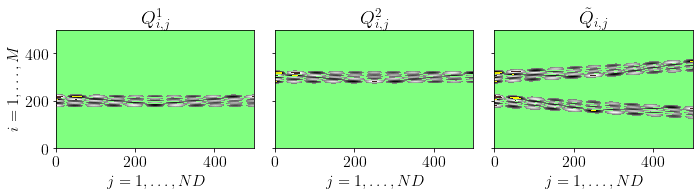

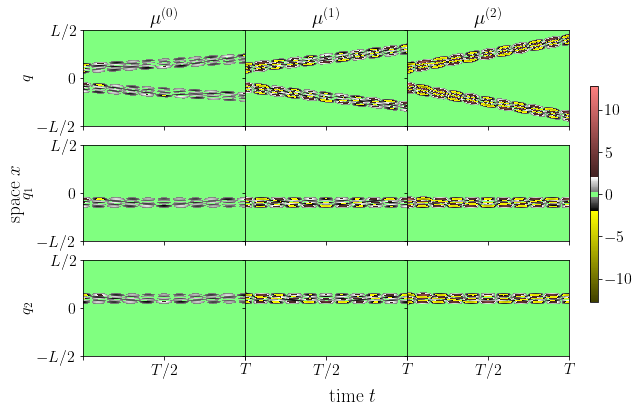

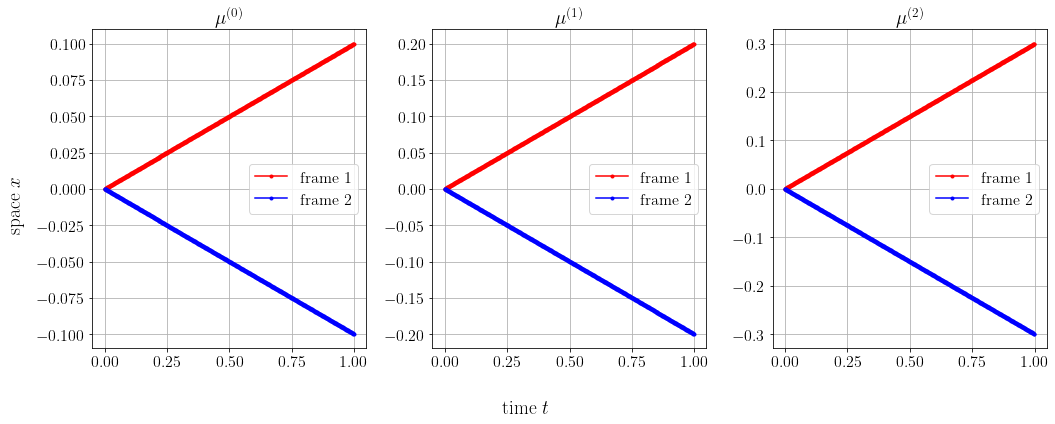

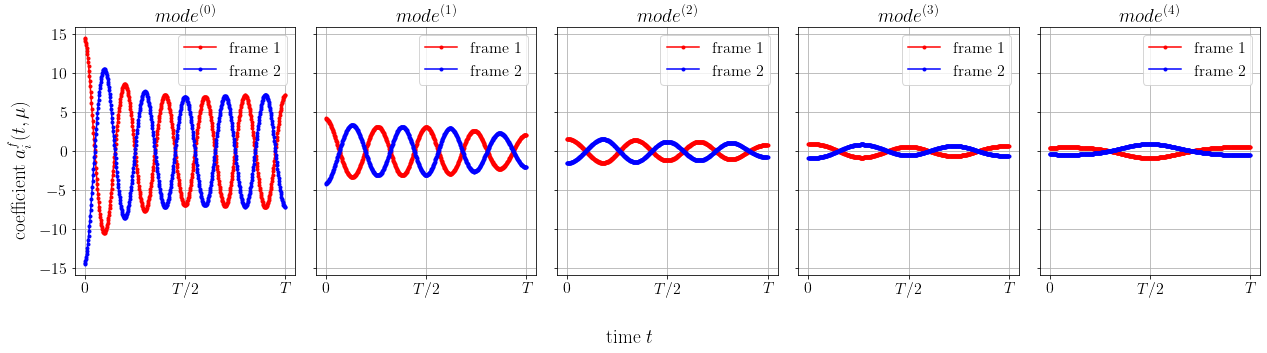

In [3]:
df = CombustionWave(spod_iter=200)        

## Input data for the network 

In [4]:
# We collect the time amplitudes, shifts and the parameters for the training as well as the testing data.
TA_TRAIN = df.TA_TRAIN
SHIFTS_TRAIN = df.SHIFTS_TRAIN
PARAMS_TRAIN = df.PARAMS_TRAIN
TA_TEST = df.TA_TEST
SHIFTS_TEST = df.SHIFTS_TEST
PARAMS_TEST = df.PARAMS_TEST
TA_POD_TRAIN = df.TA_POD_TRAIN
TA_POD_TEST = df.TA_POD_TEST

In [5]:
# Save the values for future use 

In [6]:
print("Grid, Nx : {}, Nt : {}".format(df.Nx, df.Nt))
print("Number of sPOD frames : {}".format(df.NumFrames))
print("Number of modes per frame : {}".format(df.nmodes))
print("Number of parameter instances : {}".format(int(int(TA_TRAIN.shape[1]) / df.Nt)))
print("Size of training matrix : {} x {}".format(int(TA_TRAIN.shape[0]), int(TA_TRAIN.shape[1])))

Grid, Nx : 500, Nt : 500
Number of sPOD frames : 2
Number of modes per frame : 5
Number of parameter instances : 3
Size of training matrix : 10 x 1500


In [7]:
# This cell is reserved for any data manipulations that need to be done for the network input
shifts_train = np.concatenate((np.reshape(SHIFTS_TRAIN[0], newshape=[1, -1]), np.reshape(SHIFTS_TRAIN[1], newshape=[1, -1])), axis=0)
shifts_test = np.concatenate((np.reshape(SHIFTS_TEST[0], newshape=[1, -1]), np.reshape(SHIFTS_TEST[1], newshape=[1, -1])), axis=0)

ta_train = np.concatenate((TA_TRAIN, shifts_train), axis=0)
ta_test = np.concatenate((TA_TEST, shifts_test), axis=0)

## Network call

## Feed forward neural network

In [ ]:
# Path for the pretrained weights
PATH_sPOD = 'DNN/onlyTA/training_results_local_sPOD/2022_08_25__12-34-47/trained_weights/weights.pt'
PATH_POD = 'DNN/Combustion/training_results_local_sPOD/2022_08_23__18-56-21/trained_weights/weights.pt'

In [ ]:
params_sPOD = {
        'scaling': True,  # true if the data should be scaled
        'full_order_model_dimension': df.Nx,  # N_h
        'reduced_order_model_dimension': df.nmodes * df.NumFrames + df.NumFrames,  # N
        'totalModes': df.nmodes * df.NumFrames,  # Total number of modes for all the frames
        'NumOfFrames': df.NumFrames  # Total number of frames
    }
params_POD = {
        'scaling': True,  # true if the data should be scaled
        'full_order_model_dimension': df.Nx,  # N_h
        'reduced_order_model_dimension': df.nmodes * df.NumFrames + df.NumFrames,  # N
        'totalModes': df.nmodes * df.NumFrames,  # Total number of modes for all the frames
        'NumOfFrames': 0  # Total number of frames
    }

In [ ]:
# training the model
from network import run_model 
print("#################################")
print("sPOD-DL-ROM")
trained_model_sPOD, scaling_sPOD = run_model(ta_train, PARAMS_TRAIN, epochs=100000, lr=0.0005, loss='L1', 
                       logs_folder='./DNN/Combustion/training_results_local_sPOD',
                      pretrained_load=True, pretrained_weights=PATH_sPOD, params=params_sPOD)
print("#################################\n")
print("#################################")
print("POD-DL-ROM")
trained_model_POD, scaling_POD = run_model(TA_POD_TRAIN, PARAMS_TRAIN, epochs=1000, lr=0.05, loss='L1', 
                      logs_folder='./DNN/Combustion/training_results_local_POD',
                     pretrained_load=False, pretrained_weights=PATH_POD, params=params_POD)
print("#################################\n")

In [ ]:
# loading the model
import torch
import pathlib
import os

log_folder_base_sPOD = 'DNN/Combustion/training_results_local_sPOD/'
log_folder_trained_model_sPOD = sorted(pathlib.Path(log_folder_base_sPOD).glob('*/'), key=os.path.getmtime)[-1]
PATH_sPOD = str(log_folder_trained_model_sPOD) + '/trained_weights/' + 'weights.pt'


log_folder_base_POD = 'DNN/Combustion/training_results_local_POD/'
log_folder_trained_model_POD = sorted(pathlib.Path(log_folder_base_POD).glob('*/'), key=os.path.getmtime)[-1]
PATH_POD = str(log_folder_trained_model_POD) + '/trained_weights/' + 'weights.pt'


In [ ]:
from network import scale_params
PARAMS_TEST_sPOD = scale_params(PARAMS_TEST, params_sPOD, scaling_sPOD)
PARAMS_TEST_POD = scale_params(PARAMS_TEST, params_POD, scaling_POD)

In [ ]:
# testing the model
from network import test_model 
rel_err_sPOD, results_predicted_sPOD = test_model(ta_test, PARAMS_TEST_sPOD, 
                                                  model=trained_model_sPOD, saved_model=False, 
                                                  PATH_TO_WEIGHTS=PATH_sPOD, params=params_sPOD,
                                                  scaling=scaling_sPOD) 
rel_err_POD, results_predicted_POD = test_model(TA_POD_TEST, PARAMS_TEST_POD, 
                                                model=trained_model_POD, saved_model=False,
                                               PATH_TO_WEIGHTS=PATH_POD, params=params_POD,
                                               scaling=scaling_POD)
print(rel_err_sPOD, rel_err_POD)

## Convolutional autoencoder and DNN coupled model

In [8]:
from TrainingFramework import TrainingFramework
from TestingFramework import TestingFramework
import Helper

In [13]:
dict_network_sPOD = {
        'time_amplitude_train': ta_train,
        'time_amplitude_test': ta_test,
        'parameter_train': PARAMS_TRAIN,
        'parameter_test': PARAMS_TEST,
        'batch_size': 500,
        'num_early_stop': 500,  # Number of epochs for the early stopping
        'pretrained_load': False,  # Wthere to initialize the network with pretrained weights
        'scaling': True,  # true if the data should be scaled
        'perform_svd': 'randomized',  # 'normal', 'randomized'
        'learning_rate': 0.0005,  # eta
        'full_order_model_dimension': df.Nx,  # N_h
        'reduced_order_model_dimension': df.nmodes * df.NumFrames + df.NumFrames,  # N
        'encoded_dimension': 4,  # dimension of the system after the encoder
        'omega_h': 0.8,
        'omega_N': 0.2,
        'typeConv': '1D',  # Type of convolutional layer for the network : '1D' or '2D'
        'totalModes': df.nmodes * df.NumFrames,  # Total number of modes for all the frames
        'NumOfFrames': df.NumFrames  # Total number of frames
    }


dict_network_POD = {
        'time_amplitude_train': TA_POD_TRAIN,
        'time_amplitude_test':TA_POD_TEST,
        'parameter_train': PARAMS_TRAIN,
        'parameter_test': PARAMS_TEST,
        'batch_size': 500,
        'num_early_stop': 10000,  # Number of epochs for the early stopping
        'pretrained_load': False,  # Wthere to initialize the network with pretrained weights
        'scaling': True,  # true if the data should be scaled
        'perform_svd': 'randomized',  # 'normal', 'randomized'
        'learning_rate': 0.05,  # eta
        'full_order_model_dimension': df.Nx,  # N_h
        'reduced_order_model_dimension': df.nmodes * df.NumFrames + df.NumFrames,  # N
        'encoded_dimension': 4,  # dimension of the system after the encoder
        'omega_h': 0.8,
        'omega_N': 0.2,
        'typeConv': '1D',  # Type of convolutional layer for the network : '1D' or '2D'
        'totalModes': df.nmodes * df.NumFrames + df.NumFrames,  # Total number of modes for all the frames
        'NumOfFrames': 0  # Total number of frames
    }


## -------------------------------------

In [14]:
# select the path to the pre trained weights
PATH_sPOD = 'CADNN/Combustion/training_results_local_sPOD/2022_08_23__19-55-17/net_weights/epoch_99.pt'
PATH_POD = 'CADNN/Combustion/training_results_local_sPOD/2022_08_23__19-55-17/net_weights/epoch_99.pt'

In [15]:
# Training model for sPOD
train_model_sPOD = TrainingFramework(dict_network_sPOD, split=0.70, 
                                     log_folder='./CADNN/Combustion/training_results_local_sPOD/')
trained_model_sPOD = train_model_sPOD.training(epochs=10000, save_every=500, print_every=500, 
                                               log_base_name='/', pretrained_weights=PATH_sPOD)

DATA PREPARATION START...

DATA PREPARATION DONE ...

INPUT PIPELINE BUILD START ...

INPUT PIPELINE BUILD DONE ...

[INFO] epoch : 0...
[INFO] epoch : 1...
[INFO] epoch : 2...
[INFO] epoch : 3...
[INFO] epoch : 4...
[INFO] epoch : 5...
[INFO] epoch : 6...
[INFO] epoch : 7...
[INFO] epoch : 8...
[INFO] epoch : 9...
[INFO] epoch : 10...
[INFO] epoch : 11...
[INFO] epoch : 12...
[INFO] epoch : 13...
[INFO] epoch : 14...
[INFO] epoch : 15...
[INFO] epoch : 16...
[INFO] epoch : 17...
[INFO] epoch : 18...
[INFO] epoch : 19...
[INFO] epoch : 20...
[INFO] epoch : 21...
[INFO] epoch : 22...
[INFO] epoch : 23...
[INFO] epoch : 24...
[INFO] epoch : 25...
[INFO] epoch : 26...
[INFO] epoch : 27...
[INFO] epoch : 28...
[INFO] epoch : 29...
[INFO] epoch : 30...
[INFO] epoch : 31...
[INFO] epoch : 32...
[INFO] epoch : 33...
[INFO] epoch : 34...
[INFO] epoch : 35...
[INFO] epoch : 36...
[INFO] epoch : 37...
[INFO] epoch : 38...
[INFO] epoch : 39...
[INFO] epoch : 40...
[INFO] epoch : 41...
[INFO] epoc

[INFO] epoch : 375...
[INFO] epoch : 376...
[INFO] epoch : 377...
[INFO] epoch : 378...
[INFO] epoch : 379...
[INFO] epoch : 380...
[INFO] epoch : 381...
[INFO] epoch : 382...
[INFO] epoch : 383...
[INFO] epoch : 384...
[INFO] epoch : 385...
[INFO] epoch : 386...
[INFO] epoch : 387...
[INFO] epoch : 388...
[INFO] epoch : 389...
[INFO] epoch : 390...
[INFO] epoch : 391...
[INFO] epoch : 392...
[INFO] epoch : 393...
[INFO] epoch : 394...
[INFO] epoch : 395...
[INFO] epoch : 396...
[INFO] epoch : 397...
[INFO] epoch : 398...
[INFO] epoch : 399...
[INFO] epoch : 400...
[INFO] epoch : 401...
[INFO] epoch : 402...
[INFO] epoch : 403...
[INFO] epoch : 404...
[INFO] epoch : 405...
[INFO] epoch : 406...
[INFO] epoch : 407...
[INFO] epoch : 408...
[INFO] epoch : 409...
[INFO] epoch : 410...
[INFO] epoch : 411...
[INFO] epoch : 412...
[INFO] epoch : 413...
[INFO] epoch : 414...
[INFO] epoch : 415...
[INFO] epoch : 416...
[INFO] epoch : 417...
[INFO] epoch : 418...
[INFO] epoch : 419...
[INFO] epo

[INFO] epoch : 725...
[INFO] epoch : 726...
[INFO] epoch : 727...
[INFO] epoch : 728...
[INFO] epoch : 729...
[INFO] epoch : 730...
[INFO] epoch : 731...
[INFO] epoch : 732...
[INFO] epoch : 733...
[INFO] epoch : 734...
[INFO] epoch : 735...
[INFO] epoch : 736...
[INFO] epoch : 737...
[INFO] epoch : 738...
[INFO] epoch : 739...
[INFO] epoch : 740...
[INFO] epoch : 741...
[INFO] epoch : 742...
[INFO] epoch : 743...
[INFO] epoch : 744...
[INFO] epoch : 745...
[INFO] epoch : 746...
[INFO] epoch : 747...
[INFO] epoch : 748...
[INFO] epoch : 749...
[INFO] epoch : 750...
[INFO] epoch : 751...
[INFO] epoch : 752...
[INFO] epoch : 753...
[INFO] epoch : 754...
[INFO] epoch : 755...
[INFO] epoch : 756...
[INFO] epoch : 757...
[INFO] epoch : 758...
[INFO] epoch : 759...
[INFO] epoch : 760...
[INFO] epoch : 761...
[INFO] epoch : 762...
[INFO] epoch : 763...
[INFO] epoch : 764...
[INFO] epoch : 765...
[INFO] epoch : 766...
[INFO] epoch : 767...
[INFO] epoch : 768...
[INFO] epoch : 769...
[INFO] epo

[INFO] epoch : 1071...
[INFO] epoch : 1072...
[INFO] epoch : 1073...
[INFO] epoch : 1074...
[INFO] epoch : 1075...
[INFO] epoch : 1076...
[INFO] epoch : 1077...
[INFO] epoch : 1078...
[INFO] epoch : 1079...
[INFO] epoch : 1080...
[INFO] epoch : 1081...
[INFO] epoch : 1082...
[INFO] epoch : 1083...
[INFO] epoch : 1084...
[INFO] epoch : 1085...
[INFO] epoch : 1086...
[INFO] epoch : 1087...
[INFO] epoch : 1088...
[INFO] epoch : 1089...
[INFO] epoch : 1090...
[INFO] epoch : 1091...
[INFO] epoch : 1092...
[INFO] epoch : 1093...
[INFO] epoch : 1094...
[INFO] epoch : 1095...
[INFO] epoch : 1096...
[INFO] epoch : 1097...
[INFO] epoch : 1098...
[INFO] epoch : 1099...
[INFO] epoch : 1100...
[INFO] epoch : 1101...
[INFO] epoch : 1102...
[INFO] epoch : 1103...
[INFO] epoch : 1104...
[INFO] epoch : 1105...
[INFO] epoch : 1106...
[INFO] epoch : 1107...
[INFO] epoch : 1108...
[INFO] epoch : 1109...
[INFO] epoch : 1110...
[INFO] epoch : 1111...
[INFO] epoch : 1112...
[INFO] epoch : 1113...
[INFO] epoc

[INFO] epoch : 1429...
[INFO] epoch : 1430...
[INFO] epoch : 1431...
[INFO] epoch : 1432...
[INFO] epoch : 1433...
[INFO] epoch : 1434...
[INFO] epoch : 1435...
[INFO] epoch : 1436...
[INFO] epoch : 1437...
[INFO] epoch : 1438...
[INFO] epoch : 1439...
[INFO] epoch : 1440...
[INFO] epoch : 1441...
[INFO] epoch : 1442...
[INFO] epoch : 1443...
[INFO] epoch : 1444...
[INFO] epoch : 1445...
[INFO] epoch : 1446...
[INFO] epoch : 1447...
[INFO] epoch : 1448...
[INFO] epoch : 1449...
[INFO] epoch : 1450...
[INFO] epoch : 1451...
[INFO] epoch : 1452...
[INFO] epoch : 1453...
[INFO] epoch : 1454...
[INFO] epoch : 1455...
[INFO] epoch : 1456...
[INFO] epoch : 1457...
[INFO] epoch : 1458...
[INFO] epoch : 1459...
[INFO] epoch : 1460...
[INFO] epoch : 1461...
[INFO] epoch : 1462...
[INFO] epoch : 1463...
[INFO] epoch : 1464...
[INFO] epoch : 1465...
[INFO] epoch : 1466...
[INFO] epoch : 1467...
[INFO] epoch : 1468...
[INFO] epoch : 1469...
[INFO] epoch : 1470...
[INFO] epoch : 1471...
[INFO] epoc

[INFO] epoch : 1763...
[INFO] epoch : 1764...
[INFO] epoch : 1765...
[INFO] epoch : 1766...
[INFO] epoch : 1767...
[INFO] epoch : 1768...
[INFO] epoch : 1769...
[INFO] epoch : 1770...
[INFO] epoch : 1771...
[INFO] epoch : 1772...
[INFO] epoch : 1773...
[INFO] epoch : 1774...
[INFO] epoch : 1775...
[INFO] epoch : 1776...
[INFO] epoch : 1777...
[INFO] epoch : 1778...
[INFO] epoch : 1779...
[INFO] epoch : 1780...
[INFO] epoch : 1781...
[INFO] epoch : 1782...
[INFO] epoch : 1783...
[INFO] epoch : 1784...
[INFO] epoch : 1785...
[INFO] epoch : 1786...
[INFO] epoch : 1787...
[INFO] epoch : 1788...
[INFO] epoch : 1789...
[INFO] epoch : 1790...
[INFO] epoch : 1791...
[INFO] epoch : 1792...
[INFO] epoch : 1793...
[INFO] epoch : 1794...
[INFO] epoch : 1795...
[INFO] epoch : 1796...
[INFO] epoch : 1797...
[INFO] epoch : 1798...
[INFO] epoch : 1799...
[INFO] epoch : 1800...
[INFO] epoch : 1801...
[INFO] epoch : 1802...
[INFO] epoch : 1803...
[INFO] epoch : 1804...
[INFO] epoch : 1805...
[INFO] epoc

[INFO] epoch : 2097...
[INFO] epoch : 2098...
[INFO] epoch : 2099...
[INFO] epoch : 2100...
[INFO] epoch : 2101...
[INFO] epoch : 2102...
[INFO] epoch : 2103...
[INFO] epoch : 2104...
[INFO] epoch : 2105...
[INFO] epoch : 2106...
[INFO] epoch : 2107...
[INFO] epoch : 2108...
[INFO] epoch : 2109...
[INFO] epoch : 2110...
[INFO] epoch : 2111...
[INFO] epoch : 2112...
[INFO] epoch : 2113...
[INFO] epoch : 2114...
[INFO] epoch : 2115...
[INFO] epoch : 2116...
[INFO] epoch : 2117...
[INFO] epoch : 2118...
[INFO] epoch : 2119...
[INFO] epoch : 2120...
[INFO] epoch : 2121...
[INFO] epoch : 2122...
[INFO] epoch : 2123...
[INFO] epoch : 2124...
[INFO] epoch : 2125...
[INFO] epoch : 2126...
[INFO] epoch : 2127...
[INFO] epoch : 2128...
[INFO] epoch : 2129...
[INFO] epoch : 2130...
[INFO] epoch : 2131...
[INFO] epoch : 2132...
[INFO] epoch : 2133...
[INFO] epoch : 2134...
[INFO] epoch : 2135...
[INFO] epoch : 2136...
[INFO] epoch : 2137...
[INFO] epoch : 2138...
[INFO] epoch : 2139...
[INFO] epoc

[INFO] epoch : 2457...
[INFO] epoch : 2458...
[INFO] epoch : 2459...
[INFO] epoch : 2460...
[INFO] epoch : 2461...
[INFO] epoch : 2462...
[INFO] epoch : 2463...
[INFO] epoch : 2464...
[INFO] epoch : 2465...
[INFO] epoch : 2466...
[INFO] epoch : 2467...
[INFO] epoch : 2468...
[INFO] epoch : 2469...
[INFO] epoch : 2470...
[INFO] epoch : 2471...
[INFO] epoch : 2472...
[INFO] epoch : 2473...
[INFO] epoch : 2474...
[INFO] epoch : 2475...
[INFO] epoch : 2476...
[INFO] epoch : 2477...
[INFO] epoch : 2478...
[INFO] epoch : 2479...
[INFO] epoch : 2480...
[INFO] epoch : 2481...
[INFO] epoch : 2482...
[INFO] epoch : 2483...
[INFO] epoch : 2484...
[INFO] epoch : 2485...
[INFO] epoch : 2486...
[INFO] epoch : 2487...
[INFO] epoch : 2488...
[INFO] epoch : 2489...
[INFO] epoch : 2490...
[INFO] epoch : 2491...
[INFO] epoch : 2492...
[INFO] epoch : 2493...
[INFO] epoch : 2494...
[INFO] epoch : 2495...
[INFO] epoch : 2496...
[INFO] epoch : 2497...
[INFO] epoch : 2498...
[INFO] epoch : 2499...
Training ba

[INFO] epoch : 2791...
[INFO] epoch : 2792...
[INFO] epoch : 2793...
[INFO] epoch : 2794...
[INFO] epoch : 2795...
[INFO] epoch : 2796...
[INFO] epoch : 2797...
[INFO] epoch : 2798...
[INFO] epoch : 2799...
[INFO] epoch : 2800...
[INFO] epoch : 2801...
[INFO] epoch : 2802...
[INFO] epoch : 2803...
[INFO] epoch : 2804...
[INFO] epoch : 2805...
[INFO] epoch : 2806...
[INFO] epoch : 2807...
[INFO] epoch : 2808...
[INFO] epoch : 2809...
[INFO] epoch : 2810...
[INFO] epoch : 2811...
[INFO] epoch : 2812...
[INFO] epoch : 2813...
[INFO] epoch : 2814...
[INFO] epoch : 2815...
[INFO] epoch : 2816...
[INFO] epoch : 2817...
[INFO] epoch : 2818...
[INFO] epoch : 2819...
[INFO] epoch : 2820...
[INFO] epoch : 2821...
[INFO] epoch : 2822...
[INFO] epoch : 2823...
[INFO] epoch : 2824...
[INFO] epoch : 2825...
[INFO] epoch : 2826...
[INFO] epoch : 2827...
[INFO] epoch : 2828...
[INFO] epoch : 2829...
[INFO] epoch : 2830...
[INFO] epoch : 2831...
[INFO] epoch : 2832...
[INFO] epoch : 2833...
[INFO] epoc

[INFO] epoch : 3127...
[INFO] epoch : 3128...
[INFO] epoch : 3129...
[INFO] epoch : 3130...
[INFO] epoch : 3131...
[INFO] epoch : 3132...
[INFO] epoch : 3133...
[INFO] epoch : 3134...
[INFO] epoch : 3135...
[INFO] epoch : 3136...
[INFO] epoch : 3137...
[INFO] epoch : 3138...
[INFO] epoch : 3139...
[INFO] epoch : 3140...
[INFO] epoch : 3141...
[INFO] epoch : 3142...
[INFO] epoch : 3143...
[INFO] epoch : 3144...
[INFO] epoch : 3145...
[INFO] epoch : 3146...
[INFO] epoch : 3147...
[INFO] epoch : 3148...
[INFO] epoch : 3149...
[INFO] epoch : 3150...
[INFO] epoch : 3151...
[INFO] epoch : 3152...
[INFO] epoch : 3153...
[INFO] epoch : 3154...
[INFO] epoch : 3155...
[INFO] epoch : 3156...
[INFO] epoch : 3157...
[INFO] epoch : 3158...
[INFO] epoch : 3159...
[INFO] epoch : 3160...
[INFO] epoch : 3161...
[INFO] epoch : 3162...
[INFO] epoch : 3163...
[INFO] epoch : 3164...
[INFO] epoch : 3165...
[INFO] epoch : 3166...
[INFO] epoch : 3167...
[INFO] epoch : 3168...
[INFO] epoch : 3169...
[INFO] epoc

[INFO] epoch : 3485...
[INFO] epoch : 3486...
[INFO] epoch : 3487...
[INFO] epoch : 3488...
[INFO] epoch : 3489...
[INFO] epoch : 3490...
[INFO] epoch : 3491...
[INFO] epoch : 3492...
[INFO] epoch : 3493...
[INFO] epoch : 3494...
[INFO] epoch : 3495...
[INFO] epoch : 3496...
[INFO] epoch : 3497...
[INFO] epoch : 3498...
[INFO] epoch : 3499...
Training batch Info...
Average loss_h at epoch 3499 on training set: 0.02703643466035525
Average loss_N at epoch 3499 on training set: 0.014250029188891252
Average loss at epoch 3499 on training set: 0.024479154497385025
Took: 0.044380903244018555 seconds
Validation batch Info...
Average loss_h at epoch 3499 on validation set: 0.07923675328493118
Average loss_N at epoch 3499 on validation set: 0.02734527178108692
Average loss at epoch 3499 on validation set: 0.06885845959186554
Took: 0.007593870162963867 seconds

[INFO] epoch : 3500...
[INFO] epoch : 3501...
[INFO] epoch : 3502...
[INFO] epoch : 3503...
[INFO] epoch : 3504...
[INFO] epoch : 3505..

/opt/homebrew/Caskroom/miniforge/base/envs/PyTorch/lib/python3.9/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [16]:
import os
import pathlib

# Testing model for sPOD
testing_method = ''

log_folder_base = 'CADNN/Combustion/training_results_local_sPOD/'
log_folder_trained_model = sorted(pathlib.Path(log_folder_base).glob('*/'), key=os.path.getmtime)[-1]

test_model_sPOD = TestingFramework(dict_network_sPOD)
test_model_sPOD.testing(log_folder_trained_model=str(log_folder_trained_model), 
                        testing_method=testing_method, model=trained_model_sPOD)
results_predicted_sPOD = test_model_sPOD.time_amplitude_test_output

## -------------------------------------

In [17]:
# Training model for POD
train_model_POD = TrainingFramework(dict_network_POD, split=0.80, 
                                    log_folder='./CADNN/Combustion/training_results_local_POD/')
trained_model_POD = train_model_POD.training(epochs=1000, save_every=500, print_every=500, 
                                             log_base_name='/', pretrained_weights=PATH_POD)

DATA PREPARATION START...

DATA PREPARATION DONE ...

INPUT PIPELINE BUILD START ...

INPUT PIPELINE BUILD DONE ...

[INFO] epoch : 0...
[INFO] epoch : 1...
[INFO] epoch : 2...
[INFO] epoch : 3...
[INFO] epoch : 4...
[INFO] epoch : 5...
[INFO] epoch : 6...
[INFO] epoch : 7...
[INFO] epoch : 8...
[INFO] epoch : 9...
[INFO] epoch : 10...
[INFO] epoch : 11...
[INFO] epoch : 12...
[INFO] epoch : 13...
[INFO] epoch : 14...
[INFO] epoch : 15...
[INFO] epoch : 16...
[INFO] epoch : 17...
[INFO] epoch : 18...
[INFO] epoch : 19...
[INFO] epoch : 20...
[INFO] epoch : 21...
[INFO] epoch : 22...
[INFO] epoch : 23...
[INFO] epoch : 24...
[INFO] epoch : 25...
[INFO] epoch : 26...
[INFO] epoch : 27...
[INFO] epoch : 28...
[INFO] epoch : 29...
[INFO] epoch : 30...
[INFO] epoch : 31...
[INFO] epoch : 32...
[INFO] epoch : 33...
[INFO] epoch : 34...
[INFO] epoch : 35...
[INFO] epoch : 36...
[INFO] epoch : 37...
[INFO] epoch : 38...
[INFO] epoch : 39...
[INFO] epoch : 40...
[INFO] epoch : 41...
[INFO] epoc

[INFO] epoch : 375...
[INFO] epoch : 376...
[INFO] epoch : 377...
[INFO] epoch : 378...
[INFO] epoch : 379...
[INFO] epoch : 380...
[INFO] epoch : 381...
[INFO] epoch : 382...
[INFO] epoch : 383...
[INFO] epoch : 384...
[INFO] epoch : 385...
[INFO] epoch : 386...
[INFO] epoch : 387...
[INFO] epoch : 388...
[INFO] epoch : 389...
[INFO] epoch : 390...
[INFO] epoch : 391...
[INFO] epoch : 392...
[INFO] epoch : 393...
[INFO] epoch : 394...
[INFO] epoch : 395...
[INFO] epoch : 396...
[INFO] epoch : 397...
[INFO] epoch : 398...
[INFO] epoch : 399...
[INFO] epoch : 400...
[INFO] epoch : 401...
[INFO] epoch : 402...
[INFO] epoch : 403...
[INFO] epoch : 404...
[INFO] epoch : 405...
[INFO] epoch : 406...
[INFO] epoch : 407...
[INFO] epoch : 408...
[INFO] epoch : 409...
[INFO] epoch : 410...
[INFO] epoch : 411...
[INFO] epoch : 412...
[INFO] epoch : 413...
[INFO] epoch : 414...
[INFO] epoch : 415...
[INFO] epoch : 416...
[INFO] epoch : 417...
[INFO] epoch : 418...
[INFO] epoch : 419...
[INFO] epo

[INFO] epoch : 728...
[INFO] epoch : 729...
[INFO] epoch : 730...
[INFO] epoch : 731...
[INFO] epoch : 732...
[INFO] epoch : 733...
[INFO] epoch : 734...
[INFO] epoch : 735...
[INFO] epoch : 736...
[INFO] epoch : 737...
[INFO] epoch : 738...
[INFO] epoch : 739...
[INFO] epoch : 740...
[INFO] epoch : 741...
[INFO] epoch : 742...
[INFO] epoch : 743...
[INFO] epoch : 744...
[INFO] epoch : 745...
[INFO] epoch : 746...
[INFO] epoch : 747...
[INFO] epoch : 748...
[INFO] epoch : 749...
[INFO] epoch : 750...
[INFO] epoch : 751...
[INFO] epoch : 752...
[INFO] epoch : 753...
[INFO] epoch : 754...
[INFO] epoch : 755...
[INFO] epoch : 756...
[INFO] epoch : 757...
[INFO] epoch : 758...
[INFO] epoch : 759...
[INFO] epoch : 760...
[INFO] epoch : 761...
[INFO] epoch : 762...
[INFO] epoch : 763...
[INFO] epoch : 764...
[INFO] epoch : 765...
[INFO] epoch : 766...
[INFO] epoch : 767...
[INFO] epoch : 768...
[INFO] epoch : 769...
[INFO] epoch : 770...
[INFO] epoch : 771...
[INFO] epoch : 772...
[INFO] epo

In [18]:
import os
import pathlib

# Testing model for POD
testing_method = ''

log_folder_base = 'CADNN/Combustion/training_results_local_POD/'
log_folder_trained_model = sorted(pathlib.Path(log_folder_base).glob('*/'), key=os.path.getmtime)[-1]

test_model_POD = TestingFramework(dict_network_POD)
test_model_POD.testing(log_folder_trained_model=str(log_folder_trained_model), 
                       testing_method=testing_method, model=trained_model_POD)
results_predicted_POD = test_model_POD.time_amplitude_test_output

## -------------------------------------

In [19]:
# This cell is reserved for data manipulations for the online analysis
frame_amplitudes_predicted_sPOD = results_predicted_sPOD[:-2, :]
shifts_predicted_sPOD = results_predicted_sPOD[-2:, :]
frame_amplitudes_predicted_POD = results_predicted_POD

## Online error analysis

#############################################
Online Error checks
Check 1...
Relative time amplitude error indicator for frame: 1 is 0.9952753962442922
Relative time amplitude error indicator for frame: 2 is 1.0048890681939822
Relative time amplitude error indicator (interpolation) for frame: 1 is 5.304989360097827e-05
Relative time amplitude error indicator (interpolation) for frame: 2 is 5.371541698029994e-05
Relative time amplitude error indicator for POD-DL-ROM is 0.979739546430348
Check 2...
Relative error indicator for shift: 1 is 0.10330209551056607
Relative error indicator for shift: 2 is 0.10213760591963546
Check 3...
Relative frame snapshot reconstruction error indicator for frame: 1 is 0.9953628400481752
Relative frame snapshot reconstruction error indicator for frame: 2 is 1.0047990063294814
Check 4...
Relative reconstruction error indicator for full snapshot(sPOD-DL-ROM) is 0.9994337277199056
Relative reconstruction error indicator for full snapshot(POD-DL-ROM) is 0.984490

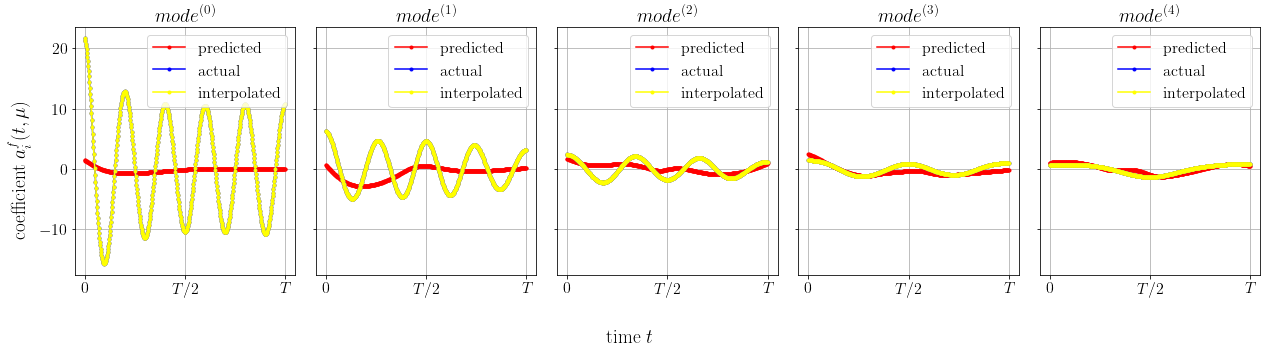

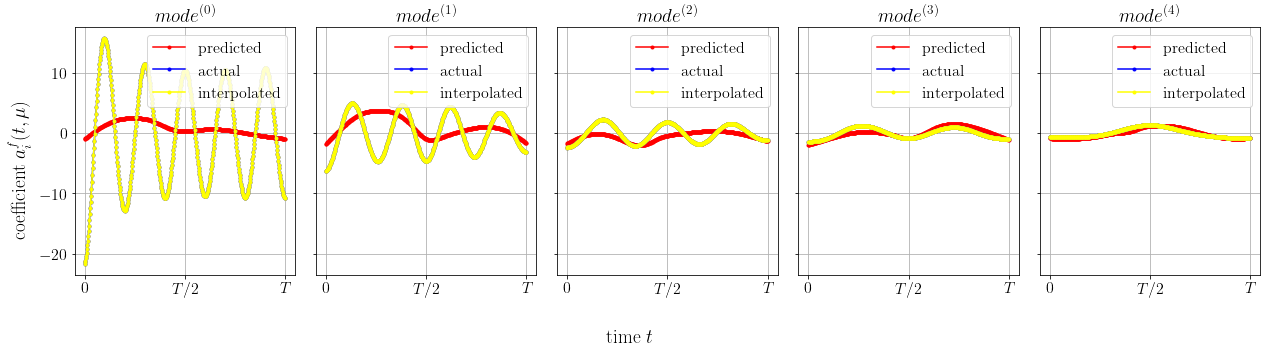

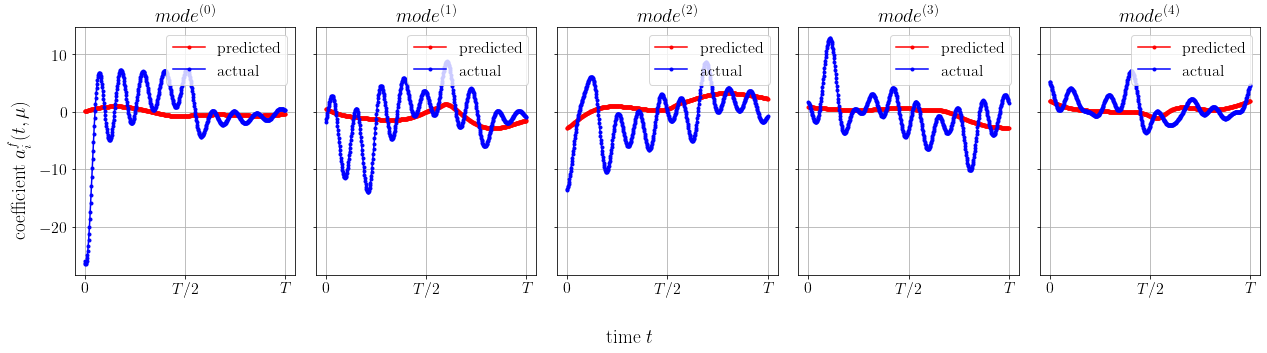

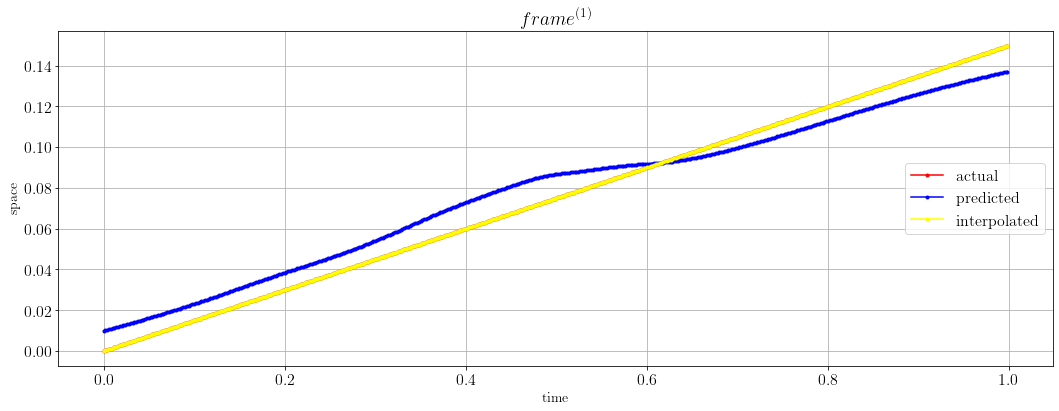

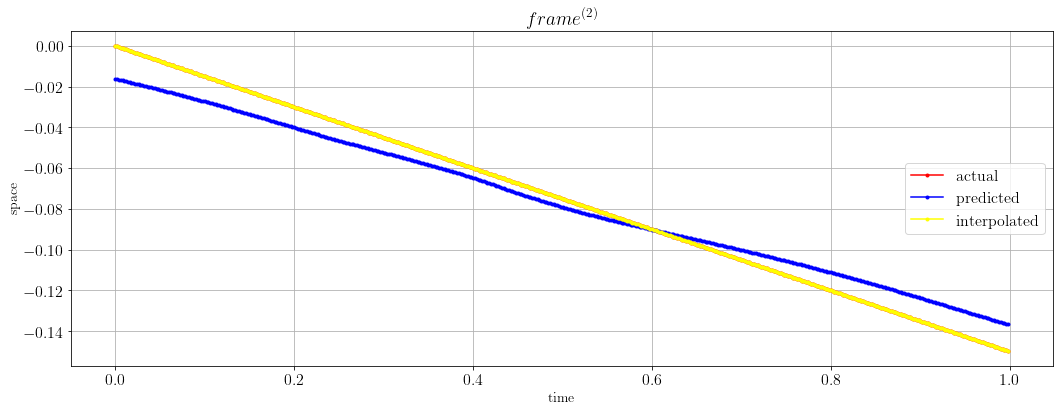

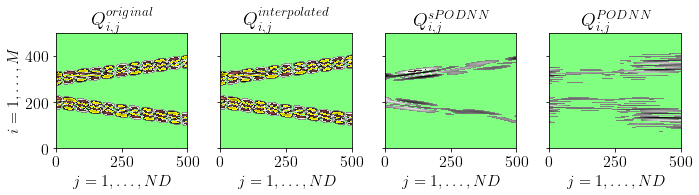

In [20]:
df.onlineErroranalysis(frame_amplitudes_predicted_sPOD, shifts_predicted_sPOD, frame_amplitudes_predicted_POD)